In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

2024-03-04 12:36:37.309615: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Inicialmente se generaron más datos para más casos, pero de usarse todos quedaría demasiado largo. Usamos solo los datos llamados ''casos particulares''.

In [14]:
df_caso_particular_cerrado = pd.read_csv('Data/H0=40_Om=0.3_Ol=0.3_Or=0_Ok=0.4.csv')
df_caso_particular_abierto = pd.read_csv('Data/H0=70_Om=0.7_Ol=0.8_Or=0_Ok=-0.5.csv')
df_caso_particular_plano = pd.read_csv('Data/H0=90_Om=0.3_Ol=0.7_Or=0_Ok=0..csv')

df_caso_libre_cerrado = pd.read_csv('Data/valores_libres_cerrado.csv')
df_caso_libre_abierto = pd.read_csv('Data/valores_libres_abierto.csv')
df_caso_libre_plano = pd.read_csv('Data/valores_libres_plano.csv')

casos_particulares = ['particular_cerrado', 'particular_abierto', 'particular_plano']
casos_libres = ['libre_cerrado', 'libre_abierto', 'libre_plano']
casos = casos_particulares + casos_libres

nombres_df = ['df_caso_particular_cerrado', 'df_caso_particular_abierto', 'df_caso_particular_plano', 'df_caso_libre_cerrado', 'df_caso_libre_abierto', 'df_caso_libre_plano']

contador = 0
tiempos = []
for nombre in nombres_df: 

    ultima_fila = globals()[nombre].iloc[-1].tolist() # De esta forma podemor ir crear variables en un bucle
    tiempo_ejecución = ultima_fila[1]
    globals()[nombre] = globals()[nombre].iloc[:-1]

    nombre_variable_tiempo = 'tiempo_' + casos[contador]
    globals()[nombre_variable_tiempo] = tiempo_ejecución
    tiempos.append(tiempo_ejecución)
    contador += 1

print(tiempos)

[27.7045, 3.23168, 2.66648, 2.98306, 2.80187, 2.80691]


# Empezamos con los casos particuales

In [ ]:
df_caso_libre_abierto

,vectorZ,vectorH0,vectorOm,vectorOl,resultados
0,843.315044,59.137387,0.136917,0.811811,61.618672
1,699.875461,69.235052,0.980453,0.006866,58.866412
2,87.718743,81.666653,0.128880,0.248995,57.072613
3,644.064934,66.934238,0.114705,0.141167,62.842814
4,226.682129,98.001729,0.969373,0.018060,55.614287
...,...,...,...,...,...
995,308.707042,98.212321,0.022682,0.250816,62.765122
996,355.834891,50.185621,0.703216,0.014936,58.717744
997,626.762929,53.946760,0.043425,0.647071,63.919062
998,746.793016,61.758302,0.214555,0.580013,61.273130


In [4]:
# Define el tamaño global de las figuras
plt.rcParams['figure.figsize'] = [10, 6]  # Cambia [10, 6] por las dimensiones deseadas

# Define el tamaño global del texto en los ejes
plt.rcParams['axes.labelsize'] = 14  # Tamaño del texto en los ejes x e y
plt.rcParams['axes.titlesize'] = 16  # Tamaño del texto en los títulos de los ejes

# Define el tamaño global del texto en la leyenda
plt.rcParams['legend.fontsize'] = 12  # Tamaño del texto en la leyenda

# Define el tamaño global del texto en otros lugares del gráfico, como los ticks
plt.rcParams['xtick.labelsize'] = 12  # Tamaño del texto en los ticks del eje x
plt.rcParams['ytick.labelsize'] = 12  # Tamaño del texto en los ticks del eje y


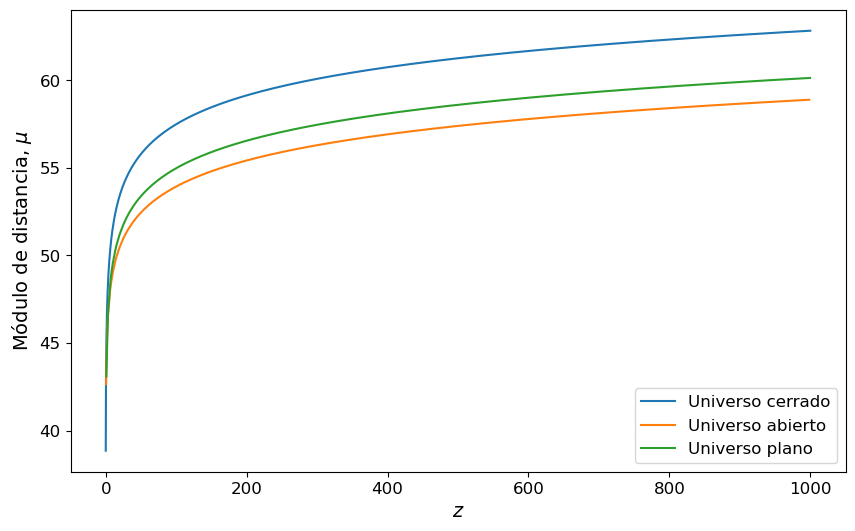

In [15]:
# Generamos los conjuntos de entrenamiento y test para cada caso de los conjuntos de datos 'particulares'.

labels = ['Universo cerrado', 'Universo abierto', 'Universo plano']

contador = 0
for caso in casos_particulares:
    nombre_variable_X_train = 'X_train_' + caso 
    nombre_variable_y_train = 'y_train_' + caso 
    nombre_variable_X_test = 'X_test_' + caso 
    nombre_variable_y_test = 'y_test_' + caso 

    nombre_df = 'df_caso_' + caso

    globals()[nombre_variable_X_train], globals()[nombre_variable_X_test], globals()[nombre_variable_y_train], globals()[nombre_variable_y_test] = train_test_split(
    globals()[nombre_df]['vectorZ'].values, globals()[nombre_df]['resultados'].values, test_size=0.33, random_state=2024)
    plt.plot(sorted(globals()[nombre_df]['vectorZ']), sorted(globals()[nombre_df]['resultados']), label = labels[contador])
    contador += 1


plt.xlabel(r'$z$')
plt.ylabel(r'Módulo de distancia, $\mu$')
plt.legend(loc = 'lower right')
plt.savefig('Figures/comparación_casos_particulares.pdf', bbox_inches = 'tight')
plt.show()

Vemos que para todos los casos la forma es muy similar, por lo que hacer el estudio con un caso es suficiente

Implementaremos los siguientes modelos:
- SVR (Regresión de vectores de soporte)
- SGD Regressor (Regresión por descenso estocástico del gradiente)
- KNeighborsRegressor (Vecinos más cercanos)
- Multi-layer Perceptron classifier
- Modelo en TensorFlow

In [ ]:
# SVR

SVR_particular_cerrado = make_pipeline(StandardScaler(),
                                       SVR(kernel = 'rbf', verbose = True)) 


SVR_particular_cerrado.fit(X_train_particular_cerrado.reshape(-1, 1), 
                           y_train_particular_cerrado)

prediccion_SVR_particular_cerrado = SVR_particular_cerrado.predict(X_test_particular_cerrado.reshape(-1, 1))

mse_SVR_particular_cerrado = mean_squared_error(y_test_particular_cerrado.reshape(-1, 1),
                                                prediccion_SVR_particular_cerrado)

r2_SVR_particular_cerrado = r2_score(y_test_particular_cerrado,
                                     prediccion_SVR_particular_cerrado)

print("\nMSE del modelo SVR:", mse_SVR_particular_cerrado)
print("R² del modelo SVR:", r2_SVR_particular_cerrado)
   

[LibSVM]..
*.
*
optimization finished, #iter = 3337
obj = -576.462646, rho = -57.643990
nSV = 846, nBSV = 812

MSE del modelo SVR: 0.16849259232866515
R² del modelo SVR: 0.9661280397551454


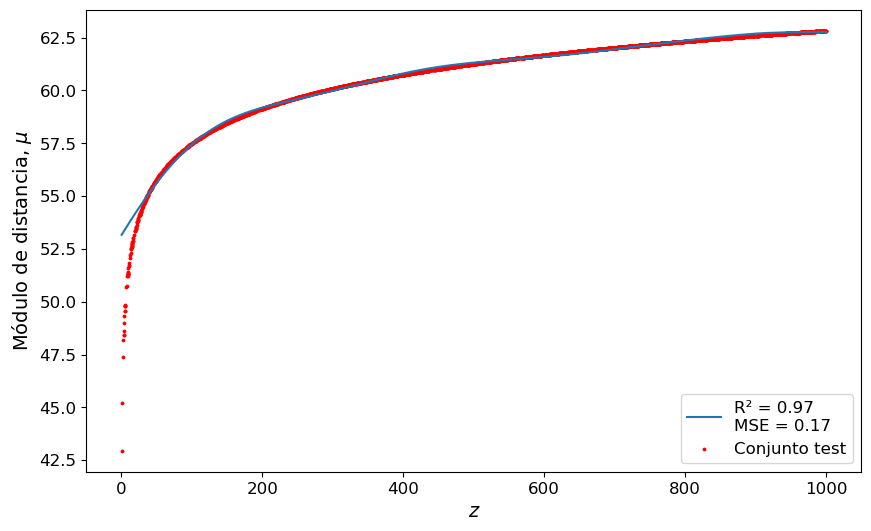

In [ ]:
plt.plot(sorted(X_test_particular_cerrado), sorted(prediccion_SVR_particular_cerrado), label = f'R² = {round(r2_SVR_particular_cerrado, 2)}\nMSE = {round(mse_SVR_particular_cerrado, 2)}')
plt.scatter(sorted(X_test_particular_cerrado), sorted(y_test_particular_cerrado), color = 'red', s = 3, label = 'Conjunto test')
plt.xlabel(r'$z$')
plt.ylabel(r'Módulo de distancia, $\mu$')
plt.legend(loc = 'lower right')
plt.savefig('Figures/modelo_SVR_particular_cerrado.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
# SGD
SGD_particular_cerrado = make_pipeline(StandardScaler(), # Hace que los datos tengan media 0 y desv. estándar 1
                                       PolynomialFeatures(degree=6),                                       
                                       SGDRegressor(verbose = True))

SGD_particular_cerrado.fit(X_train_particular_cerrado.reshape(-1, 1), 
                           y_train_particular_cerrado)

prediccion_SGD_particular_cerrado = SGD_particular_cerrado.predict(X_test_particular_cerrado.reshape(-1, 1))

score_SGD_particular_cerrado = SGD_particular_cerrado.score(X_test_particular_cerrado.reshape(-1, 1),
                                                            y_test_particular_cerrado)

mse_SVR_particular_cerrado = mean_squared_error(y_test_particular_cerrado.reshape(-1, 1),
                                                prediccion_SGD_particular_cerrado)

r2_SGD_particular_cerrado = r2_score(y_test_particular_cerrado, 
                                     prediccion_SGD_particular_cerrado)

-- Epoch 1
Norm: 30.07, NNZs: 7, Bias: 29.842691, T: 6700, Avg. loss: 25.742402
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 30.42, NNZs: 7, Bias: 30.268867, T: 13400, Avg. loss: 0.376387
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 30.52, NNZs: 7, Bias: 30.405322, T: 20100, Avg. loss: 0.256457
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 30.48, NNZs: 7, Bias: 30.402542, T: 26800, Avg. loss: 0.239035
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 30.48, NNZs: 7, Bias: 30.430643, T: 33500, Avg. loss: 0.247623
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 30.47, NNZs: 7, Bias: 30.446039, T: 40200, Avg. loss: 0.220942
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 30.45, NNZs: 7, Bias: 30.450481, T: 46900, Avg. loss: 0.212527
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 30.44, NNZs: 7, Bias: 30.459050, T: 53600, Avg. loss: 0.209774
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 30.44, NNZs: 7, Bias: 30.486716, T: 60300, Avg. loss: 0.201794


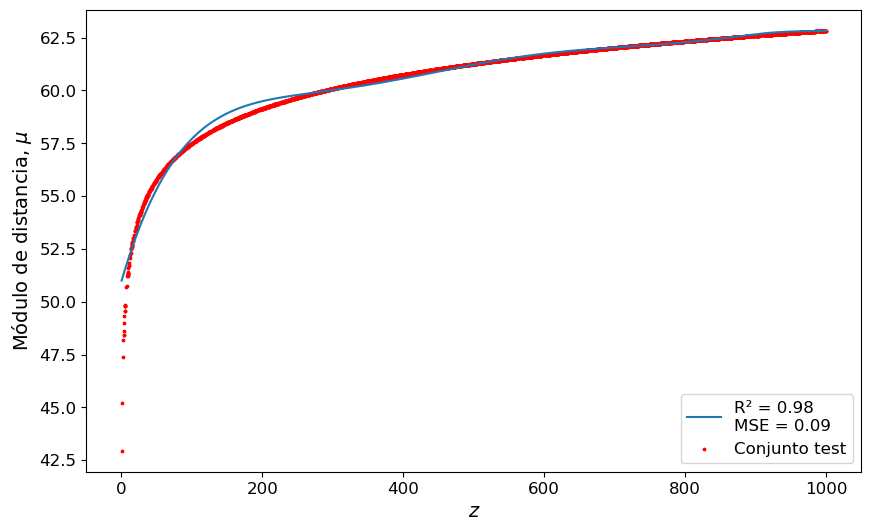

In [ ]:
plt.plot(sorted(X_test_particular_cerrado), sorted(prediccion_SGD_particular_cerrado), label = f'R² = {round(r2_SGD_particular_cerrado, 2)}\nMSE = {round(mse_SVR_particular_cerrado, 2)}')
plt.scatter(sorted(X_test_particular_cerrado), sorted(y_test_particular_cerrado), color = 'red', s = 3, label = 'Conjunto test')
plt.xlabel(r'$z$')
plt.ylabel(r'Módulo de distancia, $\mu$')
plt.legend(loc = 'lower right')
plt.savefig('Figures/modelo_SGD_particular_cerrado.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
# KNeighborsRegressor

KNeighbors_particular_cerrado = KNeighborsRegressor(n_neighbors=2)

KNeighbors_particular_cerrado.fit(X_train_particular_cerrado.reshape(-1, 1),
                                  y_train_particular_cerrado)

prediccion_KNeighbors_particular_cerrado = KNeighbors_particular_cerrado.predict(X_test_particular_cerrado.reshape(-1, 1))

mse_KNeighbors_particular_cerrado = mean_squared_error(y_test_particular_cerrado.reshape(-1, 1),
                                                prediccion_KNeighbors_particular_cerrado)

r2_KNeighbors_particular_cerrado = r2_score(y_test_particular_cerrado, prediccion_KNeighbors_particular_cerrado)

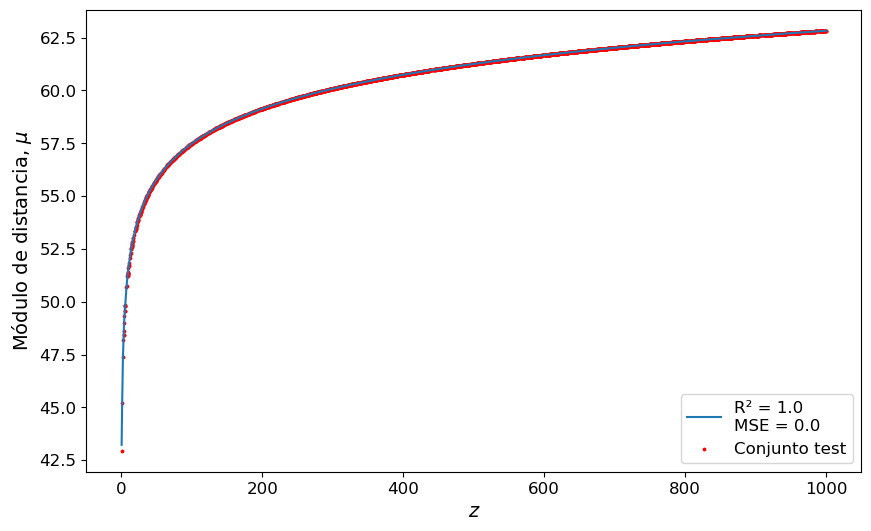

In [ ]:
plt.plot(sorted(X_test_particular_cerrado), sorted(prediccion_KNeighbors_particular_cerrado), label = f'R² = {round(r2_KNeighbors_particular_cerrado, 2)}\nMSE = {round(mse_KNeighbors_particular_cerrado, 2)}')
plt.scatter(sorted(X_test_particular_cerrado), sorted(y_test_particular_cerrado), color = 'red', s = 3, label = 'Conjunto test')
plt.xlabel(r'$z$')
plt.ylabel(r'Módulo de distancia, $\mu$')
plt.legend(loc = 'lower right')
plt.savefig('Figures/modelo_KNeighbors_particular_cerrado.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
X_train_particular_cerrado = a
X_test_particular_cerrado = b
y_train_particular_cerrado = a
y_test_particular_cerrado = b

In [16]:
# MLP

MLP_particular_cerrado = make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=[100, 50], 
                                                                      activation='relu',
                                                                      random_state = 2024))

MLP_particular_cerrado.fit(X_train_particular_cerrado.reshape(-1, 1), 
                           y_train_particular_cerrado)

prediccion_MLP_particular_cerrado = MLP_particular_cerrado.predict(X_test_particular_cerrado.reshape(-1, 1))

mse_MLP_particular_cerrado = mean_squared_error(y_test_particular_cerrado.reshape(-1, 1),
                                                prediccion_MLP_particular_cerrado)

r2_MLP_particular_cerrado = r2_score(y_test_particular_cerrado, 
                                     prediccion_MLP_particular_cerrado)

/home/jaime/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


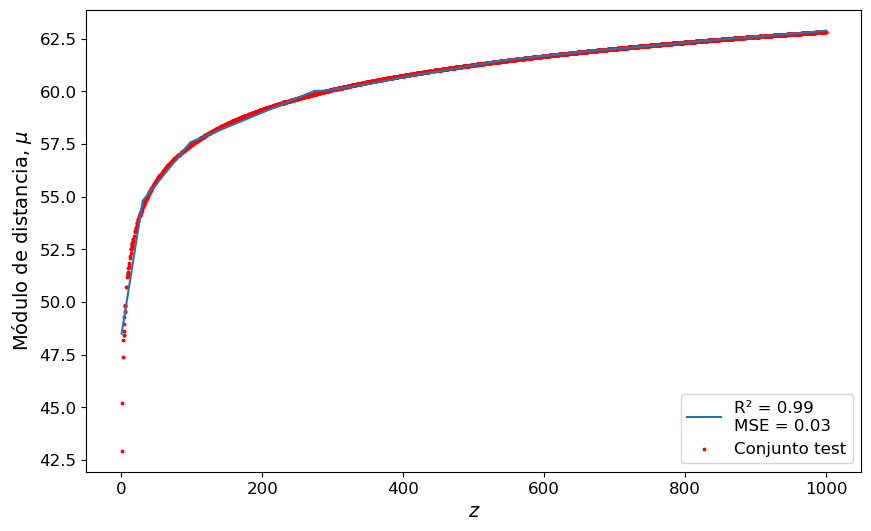

In [17]:
plt.plot(sorted(X_test_particular_cerrado), sorted(prediccion_MLP_particular_cerrado), label = f'R² = {round(r2_MLP_particular_cerrado, 2)}\nMSE = {round(mse_MLP_particular_cerrado, 2)}')
plt.scatter(sorted(X_test_particular_cerrado), sorted(y_test_particular_cerrado), color = 'red', s = 3, label = 'Conjunto test')
plt.xlabel(r'$z$')
plt.ylabel(r'Módulo de distancia, $\mu$')
plt.legend(loc = 'lower right')
plt.savefig('Figures/modelo_MLP_particular_cerrado.pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
# TensorFlow

tf_particular_cerrado = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation='relu', input_shape=(1,)),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(500, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)  # Capa de salida para la regresión lineal
])

tf_particular_cerrado.compile(optimizer='adam',
                              loss='mean_squared_error',
                              metrics=['mae'])

tf_particular_cerrado.fit(X_train_particular_cerrado,
                          y_train_particular_cerrado, 
                          validation_data = (X_test_particular_cerrado, y_test_particular_cerrado), 
                          epochs = 10)


2024-03-04 11:27:00.032580: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/10
210/210 [==============================] - 10s 23ms/step - loss: 980.4031 - mae: 25.4721 - val_loss: 728.6432 - val_mae: 22.8511
Epoch 2/10
210/210 [==============================] - 5s 23ms/step - loss: 739.5714 - mae: 22.9749 - val_loss: 601.4568 - val_mae: 20.7181
Epoch 3/10
210/210 [==============================] - 5s 23ms/step - loss: 442.5120 - mae: 17.3992 - val_loss: 88.0927 - val_mae: 8.9749
Epoch 4/10
210/210 [==============================] - 5s 22ms/step - loss: 22.1612 - mae: 2.6213 - val_loss: 0.7494 - val_mae: 0.5899
Epoch 5/10
210/210 [==============================] - 5s 22ms/step - loss: 24.0124 - mae: 2.6729 - val_loss: 1.3330 - val_mae: 0.9497
Epoch 6/10
210/210 [==============================] - 5s 22ms/step - loss: 9.0798 - mae: 1.7805 - val_loss: 0.4774 - val_mae: 0.6471
Epoch 7/10
210/210 [==============================] - 5s 23ms/step - loss: 2.6522 - mae: 1.1045 - val_loss: 0.7515 - val_mae: 0.6895
Epoch 8/10
210/210 [==============================

In [ ]:
prediccion_tf_particular_cerrado = tf_particular_cerrado.predict(X_test_particular_cerrado.reshape(-1, 1))

104/104 [==============================] - 1s 7ms/step


In [ ]:
score_tf_particular_cerrado = mean_squared_error(y_test_particular_cerrado, prediccion_tf_particular_cerrado)

r2_tf_particular_cerrado = r2_score(y_test_particular_cerrado, prediccion_tf_particular_cerrado)
print("R² del modelo de tensorflow:", r2_tf_particular_cerrado)

mse_tensorflow_particular_cerrado = mean_squared_error(y_test_particular_cerrado.reshape(-1, 1),
                                                prediccion_tf_particular_cerrado)

R² del modelo de tensorflow: 0.9527746073538939


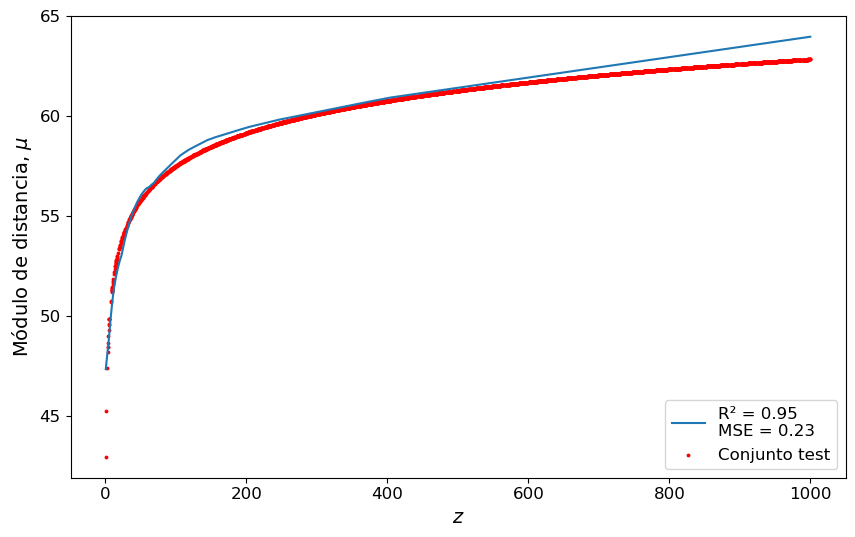

In [ ]:
plt.plot(sorted(X_test_particular_cerrado), sorted(prediccion_tf_particular_cerrado), label = f'R² = {round(r2_tf_particular_cerrado, 2)}\nMSE = {round(mse_tensorflow_particular_cerrado, 2)}')
plt.scatter(sorted(X_test_particular_cerrado), sorted(y_test_particular_cerrado), color = 'red', s = 3, label = 'Conjunto test')
plt.xlabel(r'$z$')
plt.ylabel(r'Módulo de distancia, $\mu$')
plt.legend(loc = 'lower right')
plt.savefig('Figures/modelo_tensorflow_particular_cerrado.pdf', bbox_inches = 'tight')
plt.show()

# Generación de datos con el mejor modelo (KNeighbors)

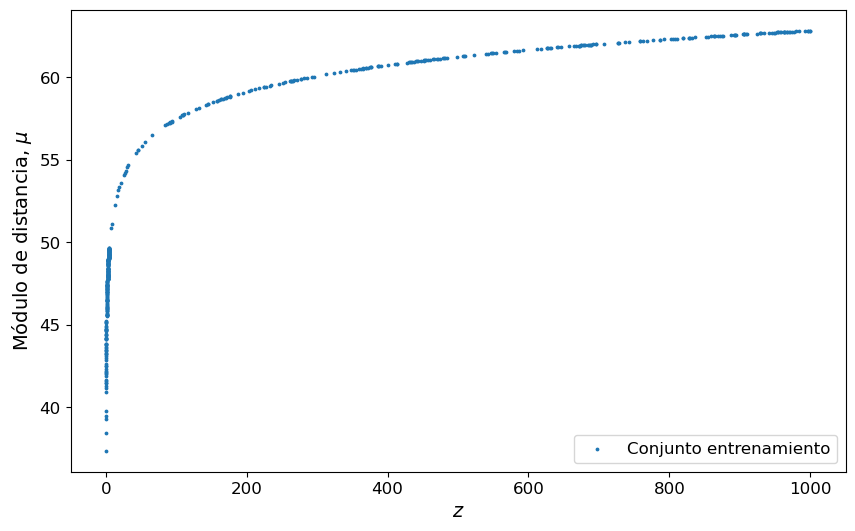

,vectorZ,resultados
0,2.945494,48.152696
1,4.875573,49.575214
2,4.758653,49.506856
3,2.143537,47.258379
4,1.288045,45.846564
...,...,...
497,89.356617,57.217460
498,18.120819,53.178227
499,266.984890,59.812681
500,0.100000,39.492546


In [23]:
df_caso_particular_cerrado2 = pd.read_csv('Data/H0=40_Om=0.3_Ol=0.3_Or=0_Ok=0.4_numPuntos_500.csv')

# Obtener los valores de la última fila
ultima_fila = df_caso_particular_cerrado2.iloc[-1].tolist()

# Guardar los valores de la última fila en variables aparte
tiempo_ejecución_caso_particular_cerrado2 = ultima_fila[1]

# Eliminar la última fila del DataFrame si ya has extraído los valores
df_caso_particular_cerrado2 = df_caso_particular_cerrado2.iloc[:-1]


plt.scatter(df_caso_particular_cerrado2['vectorZ'], df_caso_particular_cerrado2['resultados'], s = 3, label =  'Conjunto entrenamiento')
#plt.xlim(0, 1)

plt.xlabel(r'$z$')
plt.ylabel(r'Módulo de distancia, $\mu$')
plt.legend(loc = 'lower right')
#plt.xlim(0,8)
plt.savefig('Figures/conjunto_entrenamiento.pdf', bbox_inches = 'tight')
plt.show()

df_caso_particular_cerrado2

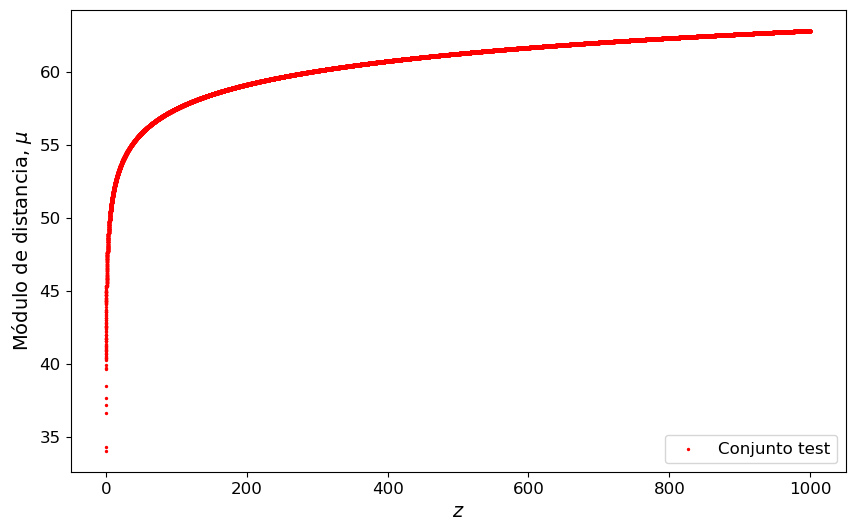

,vectorZ,resultados
0,2.945494,48.152696
1,4.875573,49.575214
2,4.758653,49.506856
3,2.143537,47.258379
4,1.288045,45.846564
...,...,...
497,89.356617,57.217460
498,18.120819,53.178227
499,266.984890,59.812681
500,0.100000,39.492546


In [19]:
# Leemos los datos de los 100000 puntos generados por Mathematica

df_caso_particular_cerrado2_test = pd.read_csv('Data/H0=40_Om=0.3_Ol=0.3_Or=0_Ok=0.4_numPuntos_100000.csv')

# Obtener los valores de la última fila
ultima_fila = df_caso_particular_cerrado2_test.iloc[-1].tolist()

# Guardar los valores de la última fila en variables aparte
tiempo_ejecución_caso_particular_cerrado2_test = ultima_fila[1]

# Eliminar la última fila del DataFrame si ya has extraído los valores
df_caso_particular_cerrado2_test = df_caso_particular_cerrado2_test.iloc[:-1]


plt.scatter(sorted(df_caso_particular_cerrado2_test['vectorZ']), sorted(df_caso_particular_cerrado2_test['resultados']), s = 2, label = 'Conjunto test', color = 'red')
plt.xlabel(r'$z$')
plt.ylabel(r'Módulo de distancia, $\mu$')
plt.legend(loc = 'lower right')
#plt.xlim(0,8)
plt.savefig('Figures/conjunto_test.pdf', bbox_inches = 'tight')
plt.savefig('Figures/conjunto_test.png', bbox_inches = 'tight', dpi = 300)
plt.show()
plt.show()

df_caso_particular_cerrado2

In [20]:
X_train = df_caso_particular_cerrado2['vectorZ']
y_train = df_caso_particular_cerrado2['resultados']

X_test = df_caso_particular_cerrado2_test['vectorZ']
y_test = df_caso_particular_cerrado2_test['resultados']

In [21]:
# KNeighborsRegressor

KNeighbors_particular_cerrado2 = KNeighborsRegressor(n_neighbors=2)

KNeighbors_particular_cerrado2.fit(X_train.values.reshape(-1, 1),
                                  y_train)

prediccion_KNeighbors_particular_cerrado2 = KNeighbors_particular_cerrado2.predict(X_test.values.reshape(-1, 1))

mse_KNeighbors_particular_cerrado2 = mean_squared_error(y_test.values.reshape(-1, 1),
                                                prediccion_KNeighbors_particular_cerrado2)

mae_KNeighbors_particular_cerrado2 = mean_absolute_error(y_test.values.reshape(-1, 1),
                                                prediccion_KNeighbors_particular_cerrado2)

r2_KNeighbors_particular_cerrado2 = r2_score(y_test, prediccion_KNeighbors_particular_cerrado2)

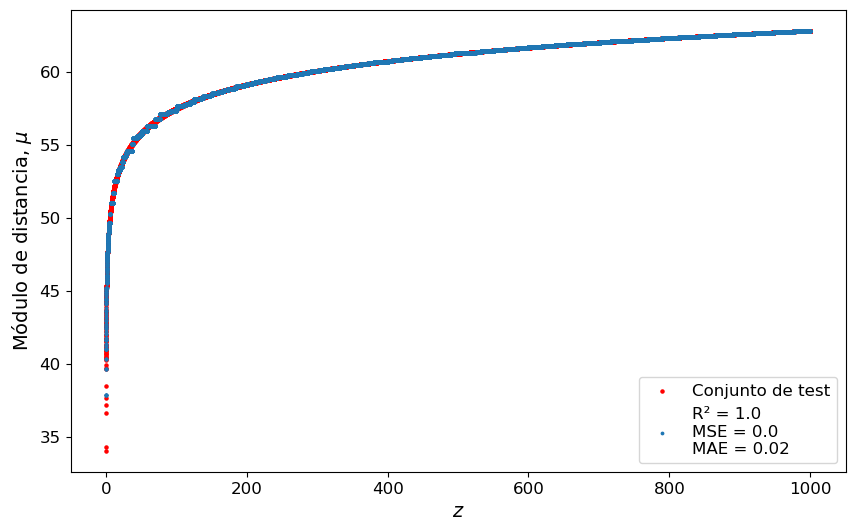

In [22]:
plt.scatter(sorted(X_test), sorted(y_test),
            label = f'Conjunto de test',
            color = 'red', s = 5)
plt.scatter(sorted(X_test), sorted(prediccion_KNeighbors_particular_cerrado2),
            label = f'R² = {round(r2_KNeighbors_particular_cerrado2, 2)}\nMSE = {round(mse_KNeighbors_particular_cerrado2, 2)}\nMAE = {round(mae_KNeighbors_particular_cerrado2, 2)}', s = 3)
#plt.scatter(sorted(X_train), sorted(y_train), color = 'red', s = 3)
 

plt.xlabel(r'$z$')
plt.ylabel(r'Módulo de distancia, $\mu$')
plt.legend(loc = 'lower right')
#plt.xlim(0,8)
plt.savefig('Figures/generacion_100000_datos.pdf', bbox_inches = 'tight')
plt.savefig('Figures/generacion_100000_datos.png', bbox_inches = 'tight', dpi = 300)

plt.show()

# Caso más 'real'

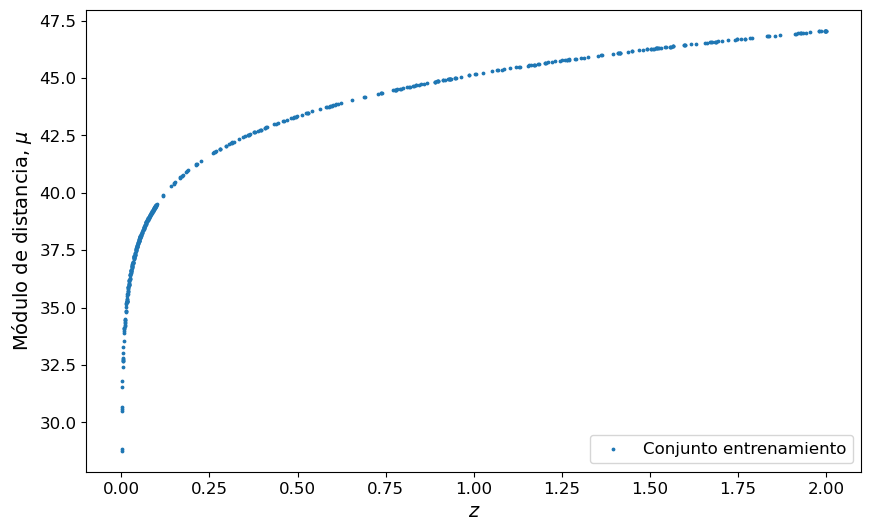

,vectorZ,resultados
0,0.063867,38.478254
1,0.044475,37.669830
2,0.014460,35.193974
3,0.098790,39.464782
4,0.037440,37.287590
...,...,...
501,1.153233,45.545298
502,0.497318,43.333235
503,0.930800,44.967843
504,0.100000,39.492546


In [5]:
df_caso_particular_cerrado3 = pd.read_csv('Data/H0=40_Om=0.3_Ol=0.3_Or=0_Ok=0.4_numPuntos_503.csv')

# Obtener los valores de la última fila
ultima_fila = df_caso_particular_cerrado3.iloc[-1].tolist()

# Guardar los valores de la última fila en variables aparte
tiempo_ejecución_caso_particular_cerrado3 = ultima_fila[1]

# Eliminar la última fila del DataFrame si ya has extraído los valores
df_caso_particular_cerrado3 = df_caso_particular_cerrado3.iloc[:-1]


plt.scatter(df_caso_particular_cerrado3['vectorZ'], df_caso_particular_cerrado3['resultados'], s = 3, label =  'Conjunto entrenamiento')
#plt.xlim(0, 1)
plt.xlabel(r'$z$')
plt.ylabel(r'Módulo de distancia, $\mu$')
plt.legend(loc = 'lower right')
#plt.xlim(0,8)
#plt.savefig('Figures/conjunto_entrenamiento.pdf', bbox_inches = 'tight')
plt.show()

df_caso_particular_cerrado3

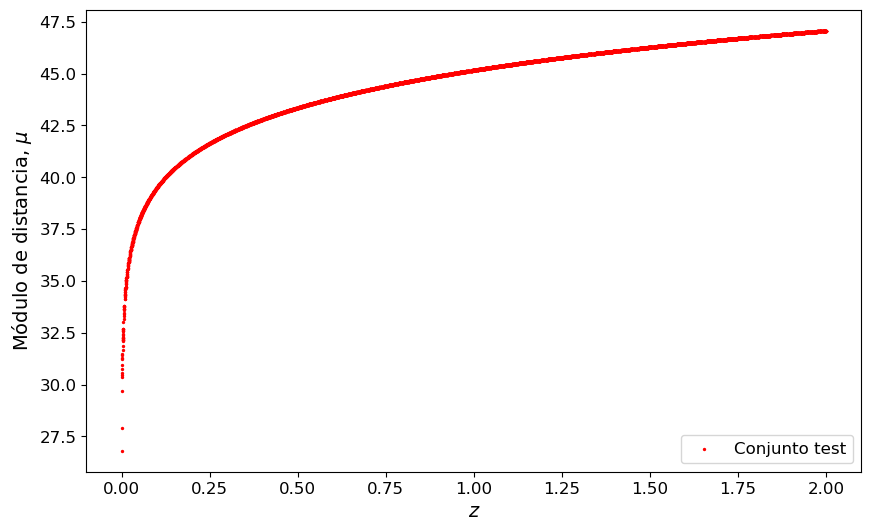

,vectorZ,resultados
0,0.063867,38.478254
1,0.044475,37.669830
2,0.014460,35.193974
3,0.098790,39.464782
4,0.037440,37.287590
...,...,...
501,1.153233,45.545298
502,0.497318,43.333235
503,0.930800,44.967843
504,0.100000,39.492546


In [6]:
# Leemos los datos de los 10000 puntos generados por Mathematica

df_caso_particular_cerrado3_test = pd.read_csv('Data/H0=40_Om=0.3_Ol=0.3_Or=0_Ok=0.4_numPuntos_10000.csv')

# Obtener los valores de la última fila
ultima_fila = df_caso_particular_cerrado3_test.iloc[-1].tolist()

# Guardar los valores de la última fila en variables aparte
tiempo_ejecución_caso_particular_cerrado3_test = ultima_fila[1]

# Eliminar la última fila del DataFrame si ya has extraído los valores
df_caso_particular_cerrado3_test = df_caso_particular_cerrado3_test.iloc[:-1]


plt.scatter(sorted(df_caso_particular_cerrado3_test['vectorZ']), sorted(df_caso_particular_cerrado3_test['resultados']), s = 2, label = 'Conjunto test', color = 'red')
plt.xlabel(r'$z$')
plt.ylabel(r'Módulo de distancia, $\mu$')
plt.legend(loc = 'lower right')
#plt.xlim(0,8)
#plt.savefig('Figures/conjunto_test.pdf', bbox_inches = 'tight')
#plt.savefig('Figures/conjunto_test.png', bbox_inches = 'tight', dpi = 300)
plt.show()

df_caso_particular_cerrado3

In [7]:
X_train = df_caso_particular_cerrado3['vectorZ']
y_train = df_caso_particular_cerrado3['resultados']

X_test = df_caso_particular_cerrado3_test['vectorZ']
y_test = df_caso_particular_cerrado3_test['resultados']

In [11]:
# KNeighborsRegressor

KNeighbors_particular_cerrado3 = KNeighborsRegressor(n_neighbors=2)

KNeighbors_particular_cerrado3.fit(X_train.values.reshape(-1, 1),
                                  y_train)

prediccion_KNeighbors_particular_cerrado3 = KNeighbors_particular_cerrado3.predict(X_test.values.reshape(-1, 1))

mse_KNeighbors_particular_cerrado3 = mean_squared_error(y_test.values.reshape(-1, 1),
                                                prediccion_KNeighbors_particular_cerrado3)

mae_KNeighbors_particular_cerrado3 = mean_absolute_error(y_test.values.reshape(-1, 1),
                                                prediccion_KNeighbors_particular_cerrado3)

r2_KNeighbors_particular_cerrado3 = r2_score(y_test, prediccion_KNeighbors_particular_cerrado3)

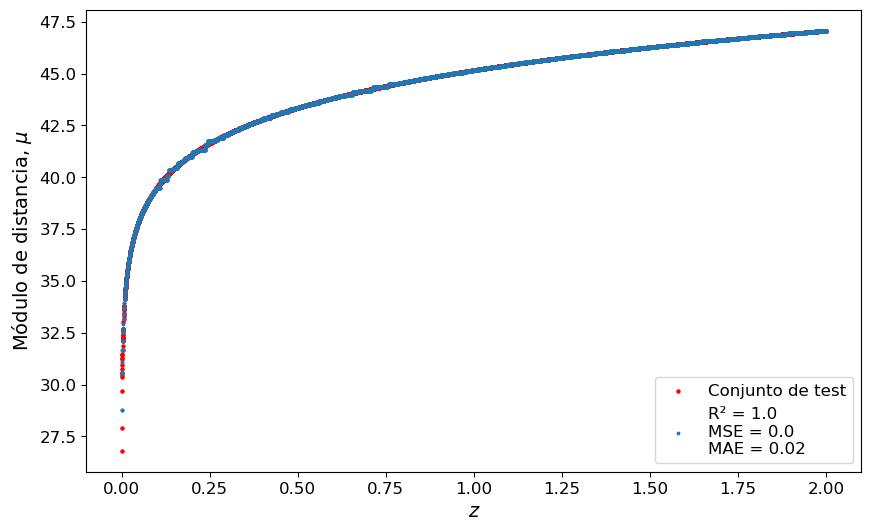

In [13]:
plt.scatter(sorted(X_test), sorted(y_test),
            label = f'Conjunto de test',
            color = 'red', s = 5)
plt.scatter(sorted(X_test), sorted(prediccion_KNeighbors_particular_cerrado3),
            label = f'R² = {round(r2_KNeighbors_particular_cerrado3, 2)}\nMSE = {round(mse_KNeighbors_particular_cerrado3, 2)}\nMAE = {round(mae_KNeighbors_particular_cerrado3, 2)}', s = 3)
#plt.scatter(sorted(X_train), sorted(y_train), color = 'red', s = 3)
 

plt.xlabel(r'$z$')
plt.ylabel(r'Módulo de distancia, $\mu$')
plt.legend(loc = 'lower right')
#plt.xlim(0,8)
plt.savefig('Figures/generacion_1000_datos.pdf', bbox_inches = 'tight')
#plt.savefig('Figures/generacion_100000_datos.png', bbox_inches = 'tight', dpi = 300)

plt.show()